# Optimizing the Python Code for Big Data 
Balancing Coding Complexity against Computational Complexity 

    
    AUTHOR: Dr. Roy Jafari 

# Chapter 5: Picking up the right tool 

## Challenge 1: Image pre-processing 

An image is essentially a dataset that contains a set of numbers for each pixel. While the dataset of an image is organized in a rectangular pixel structure, most data science algorithms are designed to work with datasets organized as tables of rows and columns. In this challenge, we will explore two approaches to transforming an image from its rectangular pixel structure into a tabular data structure. Naturally, one of these approaches demonstrates a failure to select the right tool. Let’s dive in, shall we?

1. In this challenge, we will build on an example from the first book in this series, *Optimizing the Big Data Problem Statement*, specifically from Chapter 4, *Example of Data Wrangling – Computer Vision Case Study*. If you don’t have the first book, no worries—you’ll find everything you need to understand and complete this challenge right here. First, review the example, then use the following code to load `train_d`, `train_l`, `test_d`, and `test_l` into your local Python environment.

```
from tensorflow.keras.datasets import mnist
(train_d, train_l), (test_d, test_l) = mnist.load_data()
```

In [12]:
from tensorflow.keras.datasets import mnist
(train_d, train_l), (test_d, test_l) = mnist.load_data()

2. Run the following code and study its output to understand the shape of these datasets. With the provided context, explain the data structures of these four matrices.

```
print(train_d.shape)
print(train_l.shape)
print(test_d.shape)
print(test_l.shape)
```

In [13]:
print(train_d.shape)
print(train_l.shape)
print(test_d.shape)
print(test_l.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


**Answer:** 

- `train_d` contains 60,000 images, each with 28x28 pixels.
- `test_d` contains 10,000 images, each with 28x28 pixels.
- `train_l` has a numerical label for each of the 60,000 images in `train_d`.
- `test_l` has a numerical label for each of the 10,000 images in `test_d`.

3. If you are having trouble answering the question in the previous step, run the following code for a hint.

```
print(train_d[0, :, :])
```

In [14]:
print(train_d[0, :, :])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

4. If you are still having trouble answering the question in step 2, try running the following code and study its output. This code uses the `plt.imshow()` function to visualize what we saw in step 3.

```
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.imshow(train_d[0, :, :], cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()
```

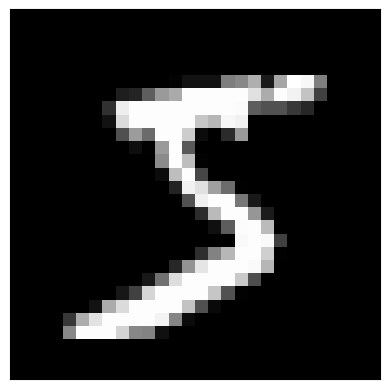

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.imshow(train_d[0, :, :], cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

5. The following code creates the pandas DataFrame, `feature_df`. We want to restructure `train_d` and `train_l` into this table. The values from columns `P0` to `P783` will come from `train_d` and the column `lable` will come from `train_l`.

```
import pandas as pd
columns = [f'P{i}' for i in range(28*28)]
columns.extend(['lable'])

feature_df = pd.DataFrame(index=range(60000), columns=columns)
feature_df
```

In [16]:
import pandas as pd
columns = [f'P{i}' for i in range(28*28)]
columns.extend(['lable'])

feature_df = pd.DataFrame(index=range(60000), columns=columns)
feature_df

,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P775,P776,P777,P778,P779,P780,P781,P782,P783,lable
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


6. The following code defines `reshape_image_ourselve()` which takes one image with 28x28 pixels and flattens the pixelated structure into a single line of numbers. Run the following code and then test it with `train_d[0, :, :]`.

```
def reshape_image_ourselve(image):
    output_sr = pd.Series(index=range(28*28))
    for i in range(28):
        output_sr.iloc[28*i:28*(i+1)] = image[i, :]
    return output_sr.values
```

In [17]:
def reshape_image_ourselve(image):
    output_sr = pd.Series(index=range(28*28))
    for i in range(28):
        output_sr.iloc[28*i:28*(i+1)] = image[i, :]
    return output_sr.values

In [18]:
one_image= train_d[0,:,:]
reshape_image_ourselve(one_image)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

7. The following code uses the function defined in the previous step, `reshape_image_ourselve()`, to fill `feature_df`. Note that `%%time` is used to time how long it takes for your computer to run the task. Run the code and note how long it took.

```
%%time
feature_df = pd.DataFrame(index=range(60000), columns=[f'P{i}' for i in range(28*28)])

for i in range(60000):
    feature_df.loc[i] = reshape_image_ourselve(train_d[i, :, :])

feature_df['lable'] = train_l
feature_df
```

In [21]:
%%time
feature_df = pd.DataFrame(index = range(60000),
                          columns = [f'P{i}' for i in range(28*28)])

for i in range(60000):
    feature_df.loc[i] = reshape_image_ourselve(train_d[i,:,:])

feature_df['lable'] = train_l
feature_df

CPU times: user 26.9 s, sys: 376 ms, total: 27.3 s
Wall time: 27.3 s


,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P775,P776,P777,P778,P779,P780,P781,P782,P783,lable
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
59996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
59997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
59998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6


**answer**: It took my computer 27.3 seconds to complete the task.

8. The following code accomplishes the same task as the previous step but uses a much better tool, `np.reshape()`. Run the following code and note how long it takes to execute.

```
%%time
feature_df = pd.DataFrame(train_d.reshape(60000, -1), columns=[f'P{i}' for i in range(28*28)])
feature_df['lable'] = train_l
feature_df
```

In [23]:
%%time
feature_df = pd.DataFrame(train_d.reshape(60000, -1), columns=[f'P{i}' for i in range(28*28)])
feature_df['lable'] = train_l
feature_df

CPU times: user 2.29 ms, sys: 163 μs, total: 2.45 ms
Wall time: 2.55 ms


,P0,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P775,P776,P777,P778,P779,P780,P781,P782,P783,lable
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


**Answer:** It took my computer 2.55 milliseconds to complete the task.

9. Compare the runtime of your computer from step 7 and step 8. Do you see a large difference? What do you think is the reason?

**Answer:** The runtime difference between steps 7 and 8 is significant. Step 7 took considerably longer than step 8. The reason for this is that in step 7, the code uses a loop to iterate over each image and manually reshape it using a custom function. This approach is inefficient and slow because it involves a lot of overhead and multiple operations for each image.

In contrast, step 8 uses the `np.reshape()` function, which is highly optimized and operates at a lower level in C, making it much faster. This function can handle the reshaping of the entire dataset in a single operation, significantly reducing the computation time.